In [18]:
# read in data and packages
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#import bamboolib as bam

In [19]:
# read in data
df = pd.read_csv('CS_DATA_ADJ.csv')

In [20]:
df1 = df.loc[((df['Year'] == 2019) | (df['Year'] == 2018)) | (df['Year'] == 2017)]

In [22]:
df1.describe()

,Mkt_Cap,Year,St_Sc_2021,St_Sc_2019,St_Sc_R_2021,St_Sc_R_2019,FWD_Return_136M_Class,FWD_Return_1M,FWD_Return_1M_REL,FWD_Return_1M_Class,...,FPE_6M_Rev,FPE_3M_Rev_REL,FPE_3M_Rev,FPE_1M_Rev_REL,FPE_1M_Rev,FPE_5Y_Pct_REL,FPE_5Y_Pct,FPE_vRIY_REL,FPE_vRIY,FPE
count,1.016910e+05,101712.000000,100464.000000,100464.000000,100464.000000,100620.000000,101691.000000,101691.000000,101691.000000,101691.000000,...,98013.000000,98349.000000,98349.000000,98652.00000,98652.000000,98857.000000,98857.000000,98857.000000,98857.000000,9.885700e+04
mean,3.484037e+04,2018.000000,50.049689,50.049689,50.049689,50.049922,0.262078,-0.000226,50.050072,0.499877,...,-0.801182,50.049567,-0.740108,50.04959,-0.716285,49.669108,50.820185,49.948069,2.086851,3.248620e+01
std,7.977476e+04,0.816501,28.822625,28.822625,28.822625,28.822736,0.439767,0.069287,28.823062,0.500002,...,215.414958,28.821848,214.992275,28.82201,214.249722,28.759021,34.209145,28.822934,214.432462,3.248410e+03
min,7.357240e+01,2017.000000,0.200000,0.200000,0.200000,0.200000,0.000000,-0.831020,0.200000,0.000000,...,-67351.213680,0.200000,-67338.858690,0.20000,-67216.474470,0.100000,0.300000,0.100000,0.098379,1.590000e+00
25%,5.802920e+03,2017.000000,25.150000,25.150000,25.150000,25.100000,0.000000,-0.036161,25.000000,0.000000,...,-0.086738,25.100000,-0.064329,25.10000,-0.036025,24.900000,17.700000,25.000000,0.734700,1.158800e+01
50%,1.188267e+04,2018.000000,50.050000,50.050000,50.050000,50.000000,0.000000,0.000000,50.000000,0.000000,...,-0.000410,50.000000,-0.001242,50.00000,0.000165,49.900000,50.900000,50.000000,1.000000,1.582100e+01
75%,2.968134e+04,2019.000000,74.950000,74.950000,74.950000,75.000000,1.000000,0.035025,75.000000,1.000000,...,0.086572,75.000000,0.061872,75.00000,0.034949,74.800000,84.700000,74.900000,1.350718,2.133800e+01
max,1.287650e+06,2019.000000,99.900000,99.900000,99.900000,99.900000,1.000000,1.849340,99.900000,1.000000,...,765.176762,99.900000,1852.023819,99.90000,1811.120531,99.800000,100.000000,99.800000,67368.629520,1.020500e+06


### Fwd Return 1M Class - 3 years of data

In [23]:
from pycaret.classification import *
r1mc = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 
                         'FWD_Return_3M_REL', 'FWD_Return_3M',  'FWD_Return_3M_Class',
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  
                         'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  
                         'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev_REL','FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 
                         'FWD_DY_3M_Rev_REL', 'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile',
                         'FWD_EVS_3M_Rev_REL', 'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [24]:
reg_experiment = setup(r1mc, target = 'FWD_Return_1M_Class', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_Return_1M_Class
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(101712, 371)"
5,Missing Values,True
6,Numeric Features,365
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7571,0.8215,0.7489,0.7607,0.7547,0.5142,0.5143,13.4330
rf,Random Forest Classifier,0.7482,0.8157,0.7346,0.7543,0.7443,0.4963,0.4965,21.7040
catboost,CatBoost Classifier,0.6758,0.7385,0.6739,0.6755,0.6747,0.3516,0.3516,56.8110
xgboost,Extreme Gradient Boosting,0.6679,0.7262,0.6697,0.6663,0.6680,0.3357,0.3358,53.7830
knn,K Neighbors Classifier,0.6601,0.7136,0.6593,0.6594,0.6593,0.3202,0.3202,233.4060
dt,Decision Tree Classifier,0.6335,0.6335,0.6349,0.6321,0.6335,0.2669,0.2670,7.4760
lightgbm,Light Gradient Boosting Machine,0.6327,0.6855,0.6311,0.6322,0.6316,0.2655,0.2655,5.3390
gbc,Gradient Boosting Classifier,0.5788,0.6128,0.5671,0.5796,0.5733,0.1575,0.1576,108.0440
ridge,Ridge Classifier,0.5576,0.0000,0.5585,0.5565,0.5575,0.1152,0.1152,0.3360
lda,Linear Discriminant Analysis,0.5574,0.5782,0.5583,0.5563,0.5573,0.1148,0.1148,4.1620


In [26]:
et1 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7556,0.8246,0.7489,0.7583,0.7535,0.5112,0.5112
1,0.7519,0.8148,0.7492,0.7525,0.7508,0.5039,0.5039
2,0.7595,0.8223,0.7500,0.7638,0.7568,0.5190,0.5191
3,0.7556,0.8211,0.7424,0.7617,0.7519,0.5111,0.5113
4,0.7622,0.8238,0.7599,0.7626,0.7612,0.5244,0.5244
5,0.7598,0.8229,0.7393,0.7701,0.7544,0.5195,0.5199
6,0.7626,0.8286,0.7542,0.7663,0.7602,0.5251,0.5252
7,0.7518,0.8172,0.7452,0.7543,0.7498,0.5035,0.5035
8,0.7519,0.8182,0.7441,0.7551,0.7496,0.5038,0.5038
9,0.7603,0.8213,0.7562,0.7618,0.7590,0.5206,0.5207


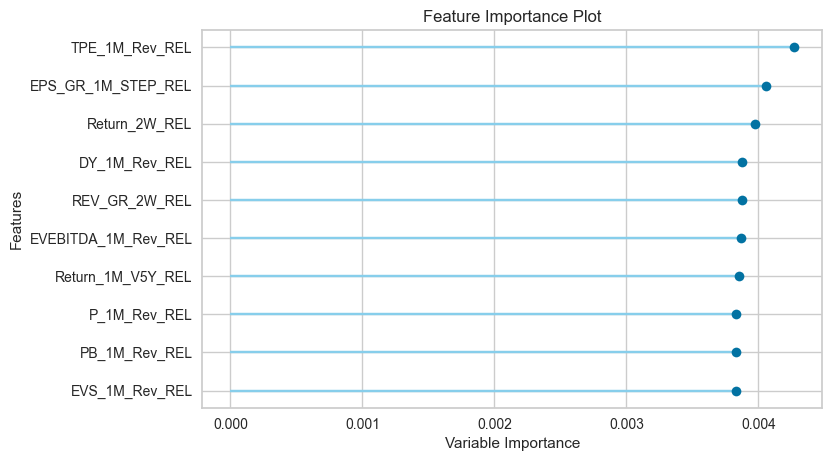

In [27]:
plot_model(et1, plot = 'feature')

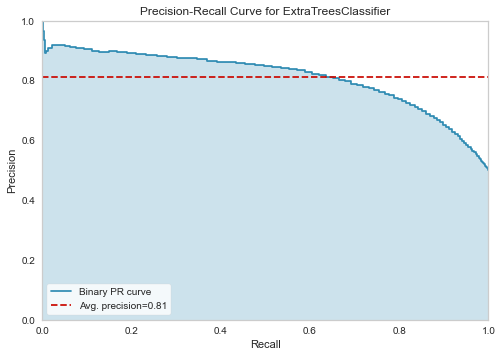

In [28]:
plot_model(et1, plot = 'pr')

### Fwd Return 3M Class - 3 years of data

In [29]:
from pycaret.classification import *
r3mc = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M',  
                         'FWD_Return_6M_Class', 'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  
                         'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  
                         'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev_REL','FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 
                         'FWD_DY_3M_Rev_REL', 'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile',
                         'FWD_EVS_3M_Rev_REL', 'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [30]:
reg_experiment = setup(r3mc, target = 'FWD_Return_3M_Class', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_Return_3M_Class
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(101712, 371)"
5,Missing Values,True
6,Numeric Features,365
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8829,0.9437,0.8796,0.8850,0.8823,0.7658,0.7658,12.4590
rf,Random Forest Classifier,0.8824,0.9460,0.8779,0.8854,0.8816,0.7648,0.7649,20.7400
knn,K Neighbors Classifier,0.8356,0.9086,0.8344,0.8357,0.8350,0.6711,0.6711,233.0970
catboost,CatBoost Classifier,0.8212,0.8969,0.8186,0.8223,0.8204,0.6424,0.6425,56.9510
xgboost,Extreme Gradient Boosting,0.8114,0.8870,0.8066,0.8138,0.8102,0.6229,0.6229,50.3010
dt,Decision Tree Classifier,0.7931,0.7931,0.7908,0.7938,0.7922,0.5862,0.5863,7.4880
lightgbm,Light Gradient Boosting Machine,0.7530,0.8303,0.7441,0.7567,0.7503,0.5059,0.5060,6.1600
gbc,Gradient Boosting Classifier,0.6368,0.6901,0.6118,0.6429,0.6269,0.2736,0.2739,106.2640
lr,Logistic Regression,0.5850,0.6182,0.5886,0.5833,0.5860,0.1701,0.1701,21.3130
lda,Linear Discriminant Analysis,0.5841,0.6180,0.5887,0.5822,0.5854,0.1682,0.1682,4.0220


In [32]:
et1 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8824,0.9444,0.8812,0.8829,0.8820,0.7649,0.7649
1,0.8809,0.9424,0.8750,0.8849,0.8799,0.7618,0.7618
2,0.8785,0.9413,0.8775,0.8787,0.8781,0.7570,0.7570
3,0.8812,0.9432,0.8798,0.8817,0.8807,0.7623,0.7623
4,0.8879,0.9469,0.8826,0.8916,0.8871,0.7758,0.7758
5,0.8847,0.9431,0.8769,0.8902,0.8835,0.7693,0.7694
6,0.8886,0.9442,0.8854,0.8907,0.8880,0.7772,0.7772
7,0.8842,0.9458,0.8803,0.8868,0.8836,0.7685,0.7685
8,0.8810,0.9423,0.8795,0.8817,0.8806,0.7620,0.7620
9,0.8797,0.9436,0.8778,0.8808,0.8793,0.7595,0.7595


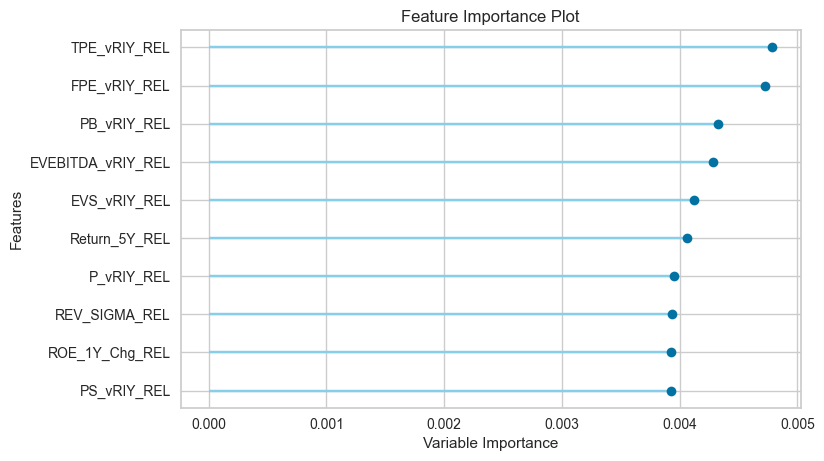

In [33]:
plot_model(et1, plot = 'feature')

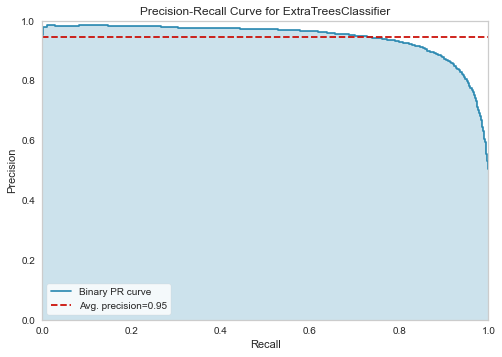

In [34]:
plot_model(et1, plot = 'pr')

### Fwd Return 6M Class - 3 years of data

In [35]:
from pycaret.classification import *
r6mc = df1.drop(columns=['FWD_Return_136M_Class',
                         'FWD_Return_1M_REL', 'FWD_Return_1M', 'FWD_Return_1M_Class',
                         'FWD_Return_3M_REL', 'FWD_Return_3M',  'FWD_Return_3M_Class',
                          'FWD_Return_6M', 'FWD_Return_6M_REL',
                         'Date', 'Year', 'ticker', 'Mkt_Cap', 'Sub_Industry', 'Sector', 
                         'St_Sc_2021', 'St_Sc_2019', 'St_Sc_R_2021', 'St_Sc_R_2019',  
                         'FWD_EPS_3M','FWD_EPS_3M_REL', 'FWD_EPS_3M_REL_Decile',  
                         'FWD_EPS_GR_3M_REV', 'FWD_EPS_GR_3M_REV_REL', 'FWD_EPS_GR_3M_REV_REL_Decile',
                         'FWD_REV_3M','FWD_REV_3M_REL', 'FWD_REV_3M_REL_Decile',  
                         'FWD_REV_GR_3M_REV', 'FWD_REV_GR_3M_REV_REL', 'FWD_REV_GR_3M_REV_REL_Decile',
                         'FWD_FPE_3M_Rev_REL','FWD_FPE_3M_Rev', 'FWD_FPE_3M_Rev_REL_Decile', 
                         'FWD_DY_3M_Rev_REL', 'FWD_DY_3M_Rev', 'FWD_DY_3M_Rev_REL_Decile',
                         'FWD_EVS_3M_Rev_REL', 'FWD_EVS_3M_Rev', 'FWD_EVS_3M_Rev_REL_Decile',
                         'FWD_PB_3M_Rev_REL', 'FWD_PB_3M_Rev', 'FWD_PB_3M_Rev_REL_Decile'])

In [36]:
reg_experiment = setup(r6mc, target = 'FWD_Return_6M_Class', session_id=123, normalize = True,
                      remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,session_id,123
1,Target,FWD_Return_6M_Class
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(101712, 373)"
5,Missing Values,True
6,Numeric Features,365
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9183,0.9708,0.9154,0.9208,0.9181,0.8365,0.8366,19.2000
et,Extra Trees Classifier,0.9168,0.9668,0.9152,0.9182,0.9167,0.8336,0.8336,11.7730
knn,K Neighbors Classifier,0.8814,0.9474,0.8823,0.8809,0.8816,0.7628,0.7629,240.0930
catboost,CatBoost Classifier,0.8705,0.9414,0.8731,0.8687,0.8709,0.7409,0.7410,49.7750
xgboost,Extreme Gradient Boosting,0.8670,0.9370,0.8663,0.8678,0.8670,0.7340,0.7341,45.9920
dt,Decision Tree Classifier,0.8363,0.8363,0.8358,0.8369,0.8364,0.6727,0.6727,8.0540
lightgbm,Light Gradient Boosting Machine,0.8021,0.8822,0.8023,0.8022,0.8022,0.6041,0.6041,6.5940
gbc,Gradient Boosting Classifier,0.6780,0.7437,0.6833,0.6765,0.6799,0.3560,0.3560,108.2840
lda,Linear Discriminant Analysis,0.6331,0.6823,0.6544,0.6280,0.6409,0.2661,0.2664,4.2900
ridge,Ridge Classifier,0.6330,0.0000,0.6542,0.6280,0.6408,0.2660,0.2662,0.3430


In [38]:
rf1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9164,0.9714,0.9141,0.9185,0.9163,0.8328,0.8329
1,0.9184,0.9699,0.9135,0.9226,0.9180,0.8368,0.8368
2,0.9177,0.9711,0.9138,0.9211,0.9174,0.8354,0.8354
3,0.9216,0.9727,0.9211,0.9221,0.9216,0.8432,0.8432
4,0.9204,0.9688,0.9206,0.9203,0.9204,0.8407,0.8407
5,0.9181,0.9712,0.9113,0.9240,0.9176,0.8362,0.8363
6,0.9180,0.9708,0.9147,0.9209,0.9177,0.8359,0.8359
7,0.9181,0.9692,0.9144,0.9214,0.9179,0.8362,0.8362
8,0.9180,0.9716,0.9183,0.9178,0.9180,0.8359,0.8359
9,0.9161,0.9714,0.9127,0.9191,0.9159,0.8323,0.8323


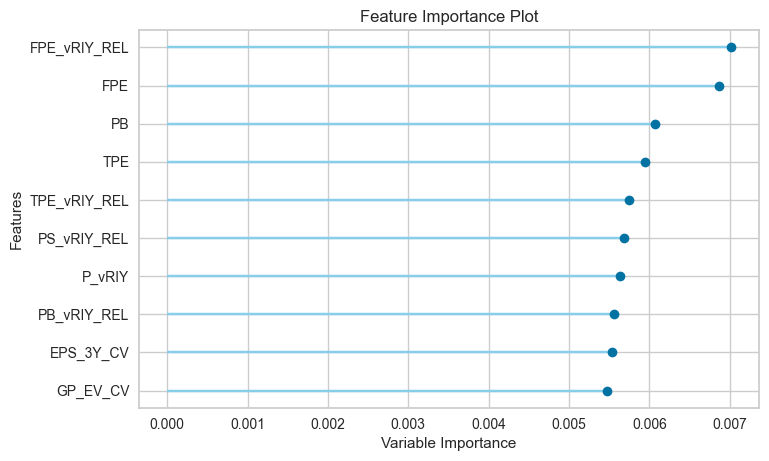

In [39]:
plot_model(rf1, plot = 'feature')

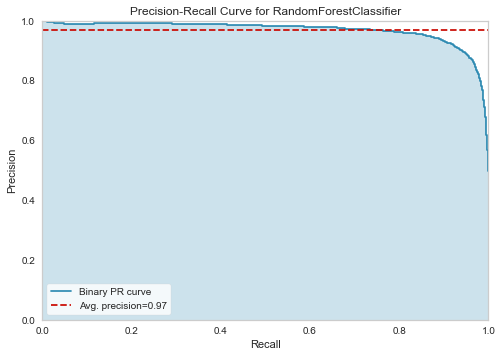

In [40]:
plot_model(rf1, plot = 'pr')